In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#df = pd.read_csv(r'file_path')
df = sns.load_dataset('mpg')

In [3]:
df.shape

(398, 9)

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [6]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [10]:
df['name'].nunique()

305

In [11]:
df['weight'].nsmallest()

54     1613
144    1649
343    1755
345    1760
53     1773
Name: weight, dtype: int64

In [12]:
df['weight'].nlargest()

44     5140
103    4997
42     4955
90     4952
95     4951
Name: weight, dtype: int64

In [13]:
df['weight'].min()

1613

In [14]:
df['weight'].max()

5140

### Data Cleaning

In [15]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [16]:
df.notnull().sum()

mpg             398
cylinders       398
displacement    398
horsepower      392
weight          398
acceleration    398
model_year      398
origin          398
name            398
dtype: int64

In [17]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [18]:
nul = df.isna().any(axis=1)
df[nul]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [19]:
df.duplicated().sum()

0

In [20]:
df['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [21]:
df['horsepower'].fillna(df['horsepower'].mean(), inplace = True)

In [22]:
origin_count = df['origin'].value_counts()
origin_count

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [23]:
origin_count.sort_values(ascending=True)

origin
europe     70
japan      79
usa       249
Name: count, dtype: int64

In [24]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [25]:
df['name']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: object

### Fearture Engineering

In [26]:
df['Brand'] = df['name'].str.split().str[0]
df['Model'] = df['name'].str.split().str[1]

In [27]:
current_year = 2024
df['car_age'] = current_year - (1900 + df['model_year'])

In [28]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Brand,Model,car_age
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle,54
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark,54
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite,54
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel,54
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino,54
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford,mustang,42
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw,pickup,42
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge,rampage,42
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford,ranger,42


In [29]:
df['Brand'].replace({'chevroelt':'chevrolet', 'toyouta':'toyota','vokswagen':'volkswagen','mercedes':'mercedes-benz'}, inplace=True)

In [30]:
df['Brand'].nunique()

33

In [31]:
df['Brand'].value_counts()

Brand
ford             51
chevrolet        44
plymouth         31
amc              28
dodge            28
toyota           26
datsun           23
buick            17
pontiac          16
volkswagen       16
honda            13
mercury          11
oldsmobile       10
mazda            10
peugeot           8
fiat              8
audi              7
volvo             6
vw                6
chrysler          6
renault           5
subaru            4
saab              4
opel              4
chevy             3
mercedes-benz     3
bmw               2
maxda             2
cadillac          2
hi                1
capri             1
triumph           1
nissan            1
Name: count, dtype: int64

In [32]:
cat = df.select_dtypes(include=['object']).columns
num = df.select_dtypes(exclude=['object']).columns.tolist()

print(cat)
print(num)

Index(['origin', 'name', 'Brand', 'Model'], dtype='object')
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'car_age']


### **Univeriate Analysis**

mpg
0


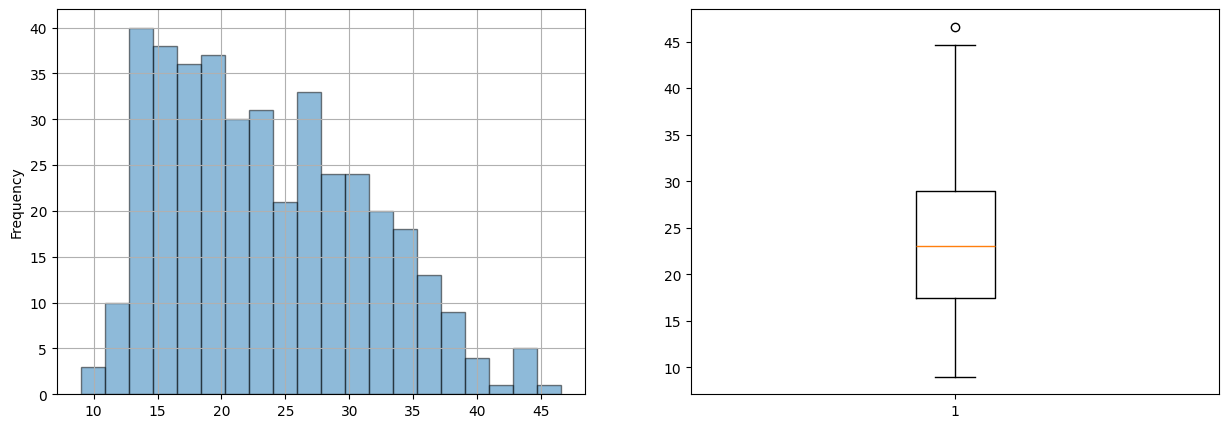

cylinders
1


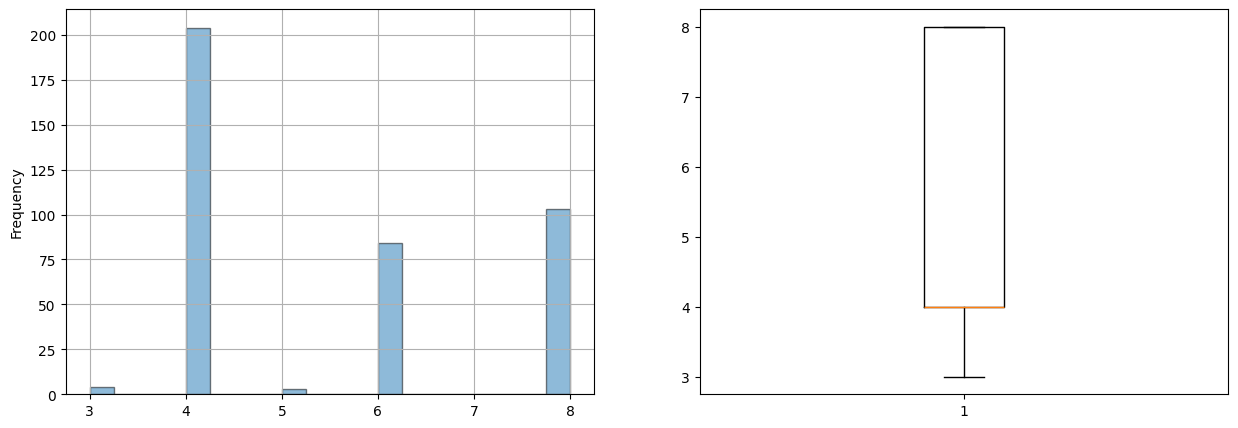

displacement
1


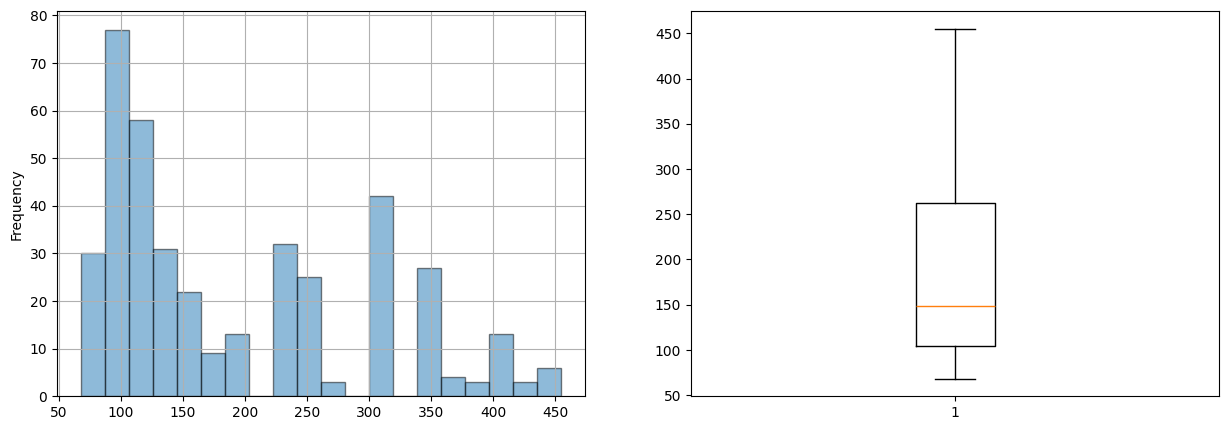

horsepower
1


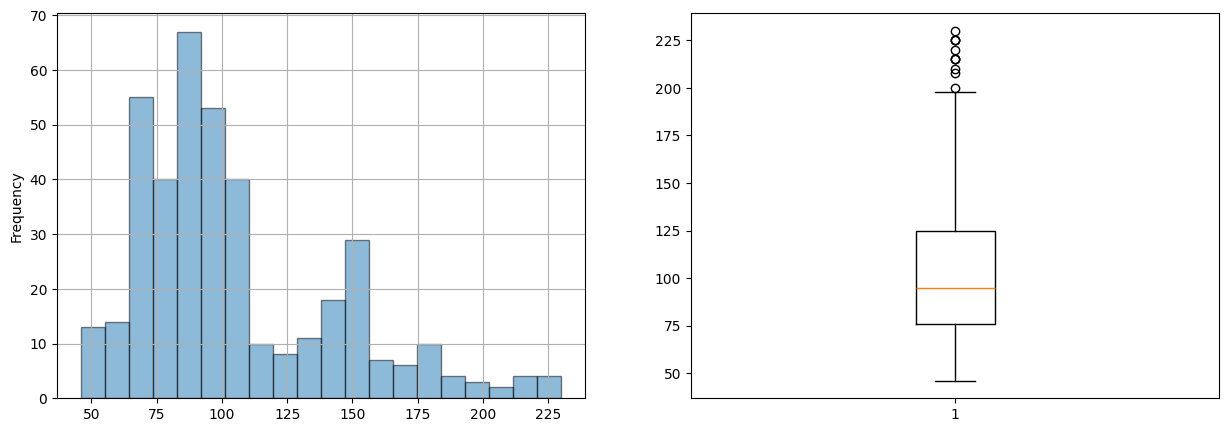

weight
1


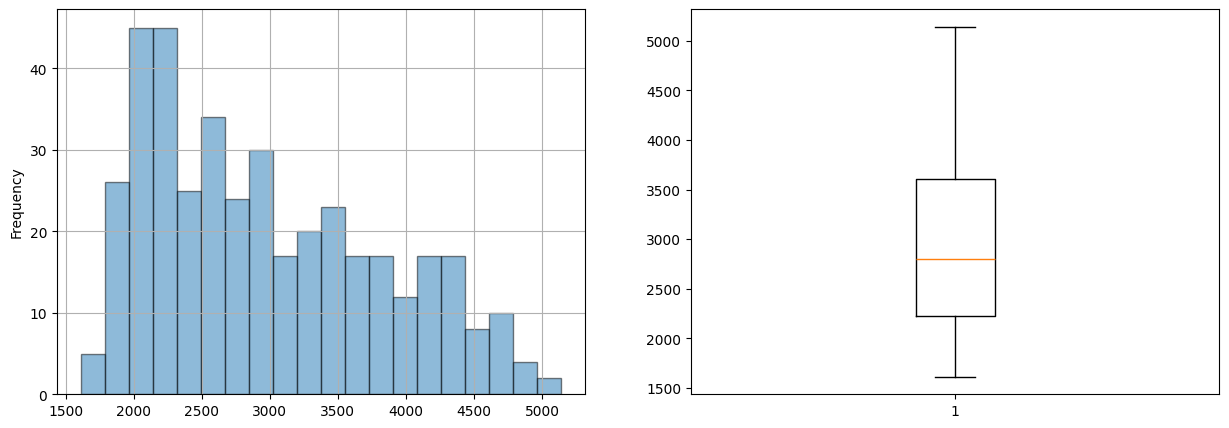

acceleration
0


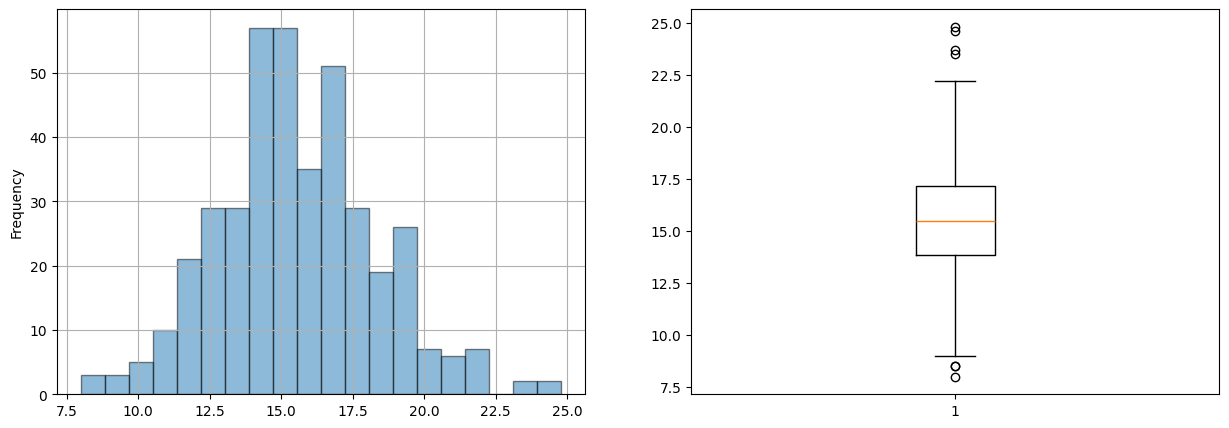

model_year
0


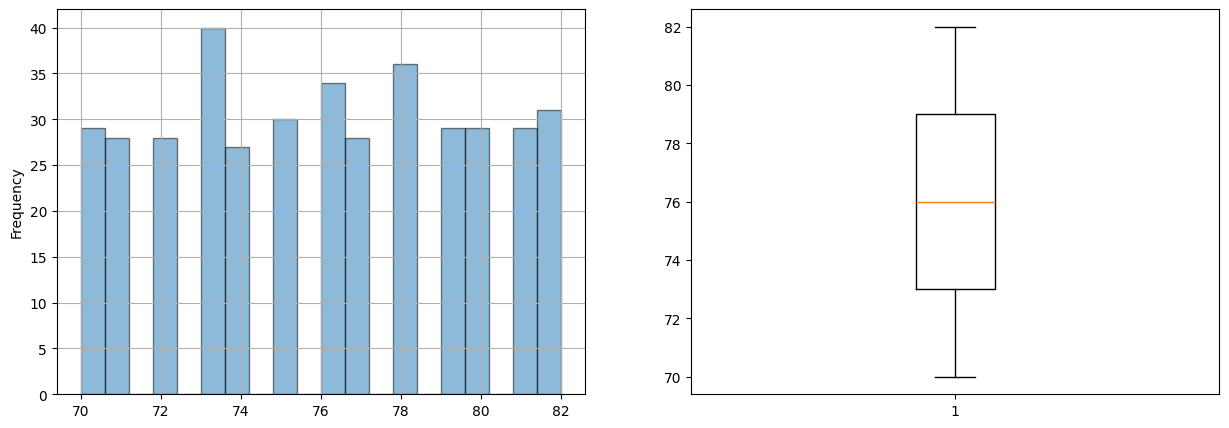

car_age
0


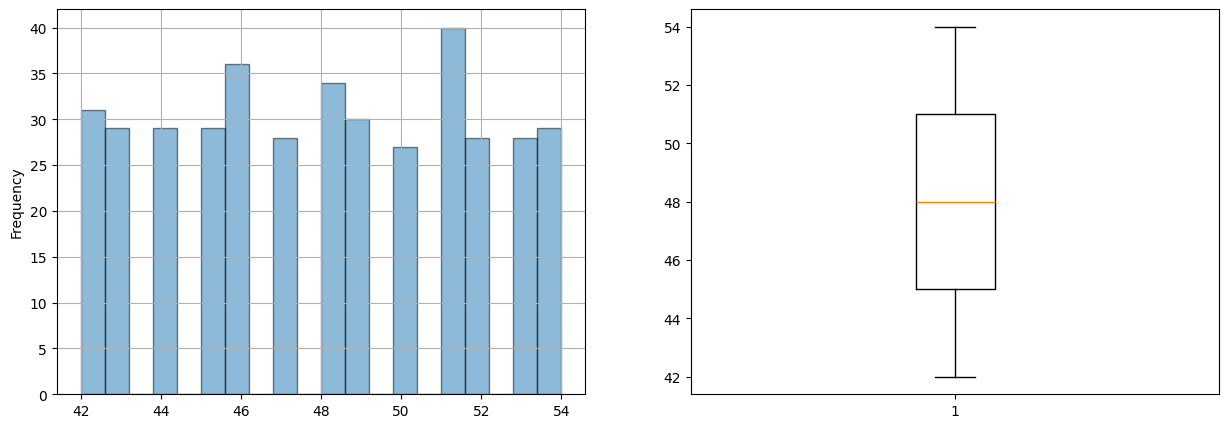

In [33]:
for col in num:
    print(col)

    print(round(df[col].skew()))

    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    df[col].hist(bins=20, alpha=0.5, label=col, edgecolor='black')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.boxplot(df[col])

    plt.show()

origin


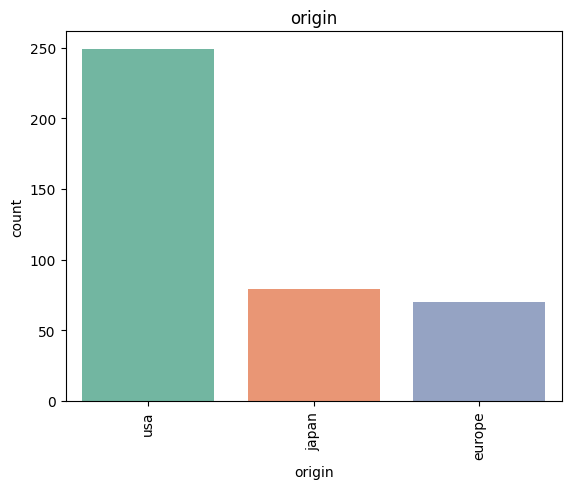

Brand


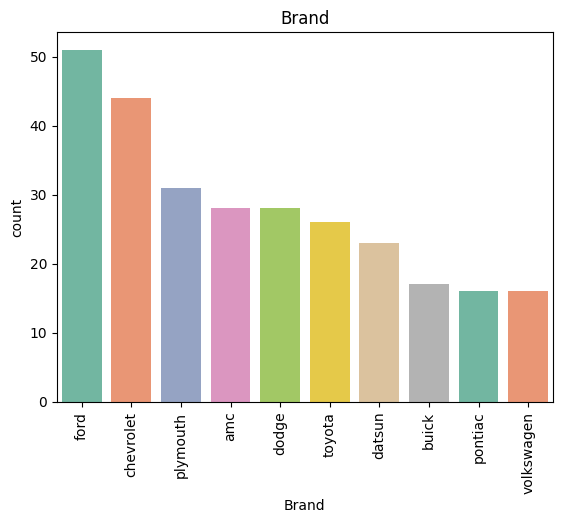

Model


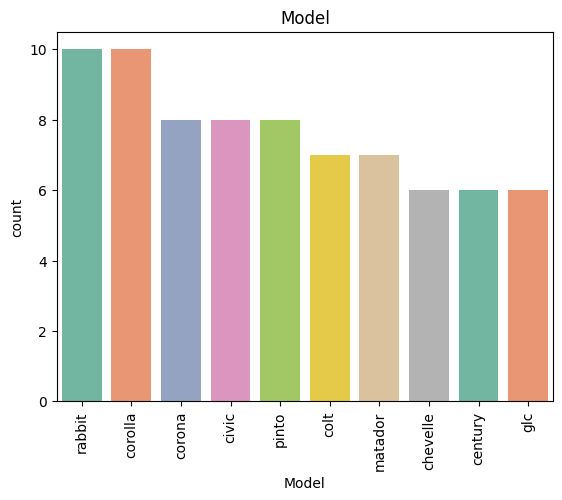

In [34]:
for col in cat.drop(['name']):
    print(col)
    plt.figure()
    sns.countplot(x=col, data=df, order=df[col].value_counts().head(10).index, palette='Set2')
    plt.xticks(rotation=90)
    plt.title(col)
    plt.show()

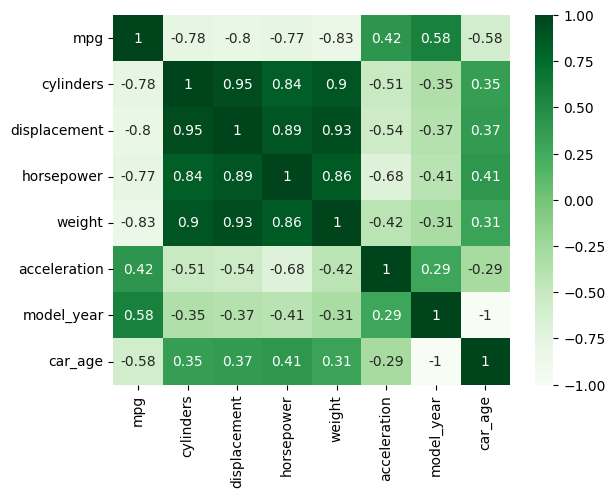

In [35]:
cor = df[num].corr(method='pearson')
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

In [36]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name', 'Brand', 'Model',
       'car_age'],
      dtype='object')

In [37]:
country = df['origin'].value_counts()
country

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

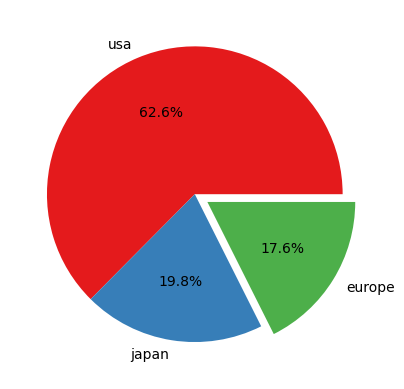

In [38]:
plt.pie(country, labels=country.index, autopct="%1.1f%%", explode=[0,0,0.1], colors=sns.color_palette('Set1'))
plt.show()

In [39]:
 HP_analysis = df.groupby('Brand').agg({'horsepower':'mean'})
 HP_analysis.reset_index().style.background_gradient(cmap='BrBG')

,Brand,horsepower
0,amc,114.338192
1,audi,86.714286
2,bmw,111.500000
3,buick,136.411765
4,cadillac,152.500000
5,capri,92.000000
6,chevrolet,112.750000
7,chevy,142.333333
8,chrysler,153.666667
9,datsun,83.826087


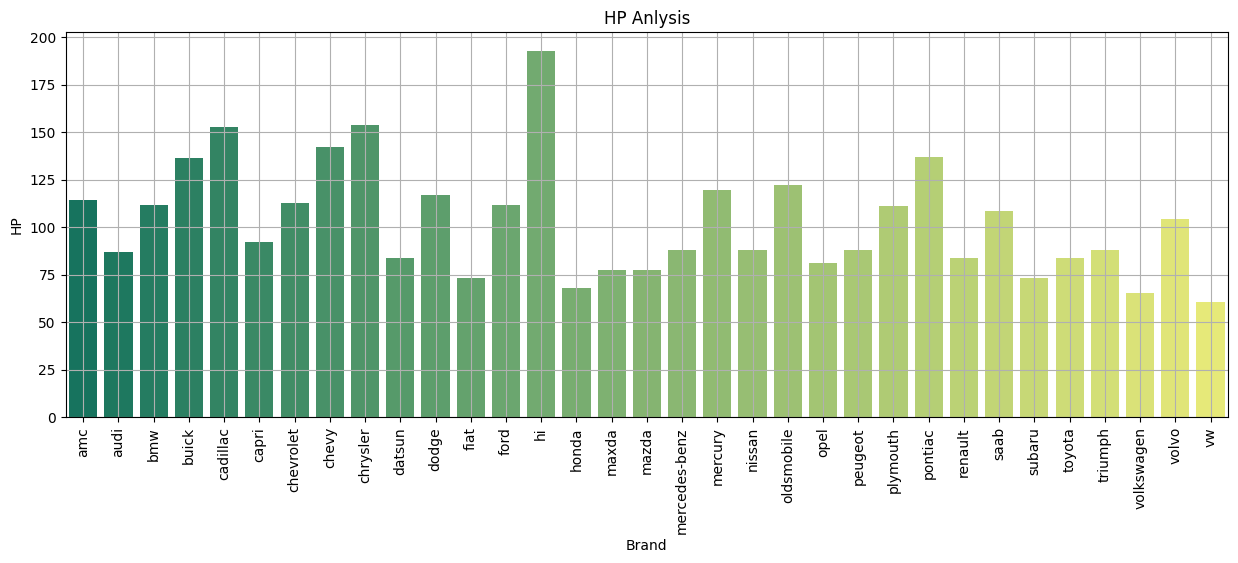

In [40]:
 plt.figure(figsize=(15,5))
 sns.barplot(x='Brand', y = 'horsepower',data=HP_analysis, palette='summer')
 plt.xlabel('Brand')
 plt.xticks(rotation=90)
 plt.ylabel('HP')
 plt.title('HP Anlysis')
 plt.grid(True)
 plt.show()

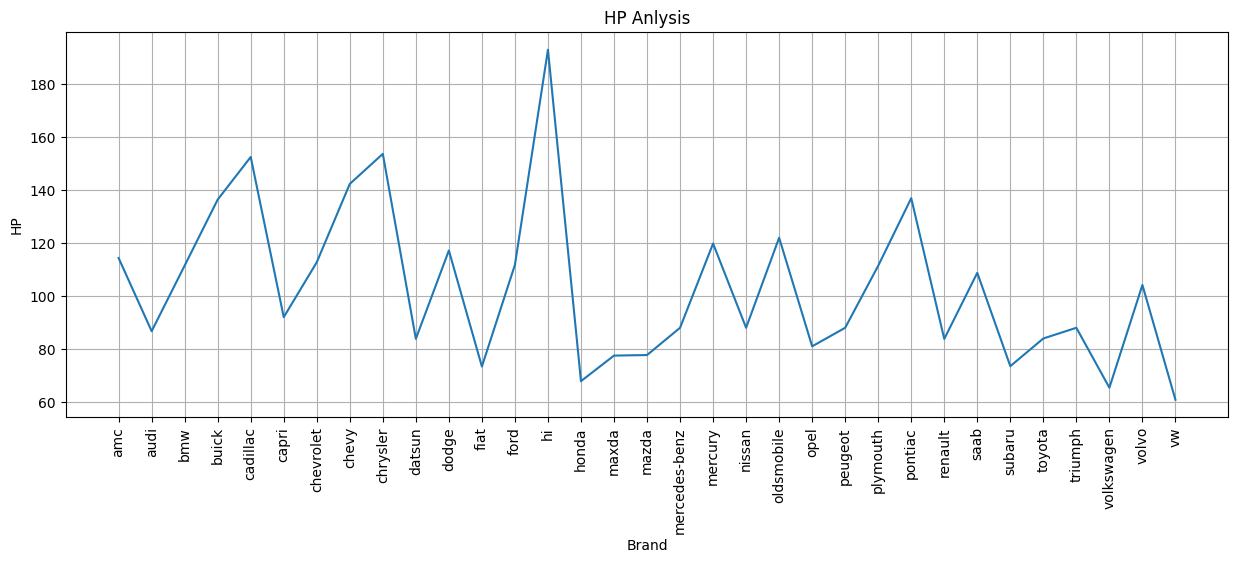

In [41]:
 plt.figure(figsize=(15,5))
 sns.lineplot(x='Brand', y = 'horsepower',data=HP_analysis, palette='summer')
 plt.xlabel('Brand')
 plt.xticks(rotation=90)
 plt.ylabel('HP')
 plt.title('HP Anlysis')
 plt.grid(True)
 plt.show()

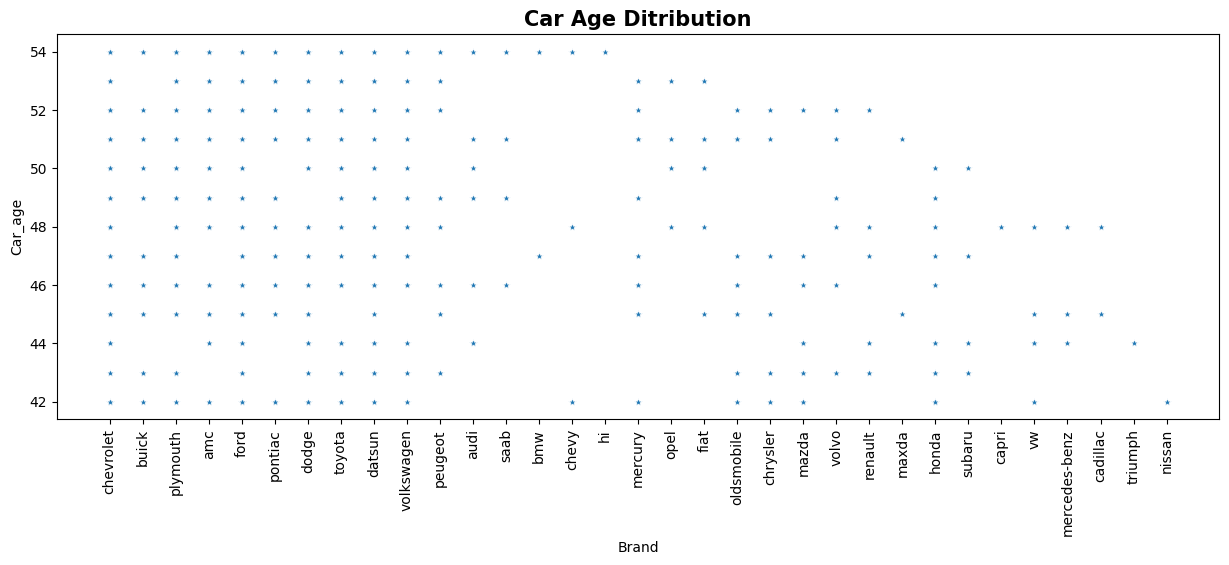

In [42]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Brand', y='car_age', data=df, palette='Set1', marker='*') #markersize=8
plt.xlabel('Brand')
plt.ylabel('Car_age')
plt.title('Car Age Ditribution', fontsize=15, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

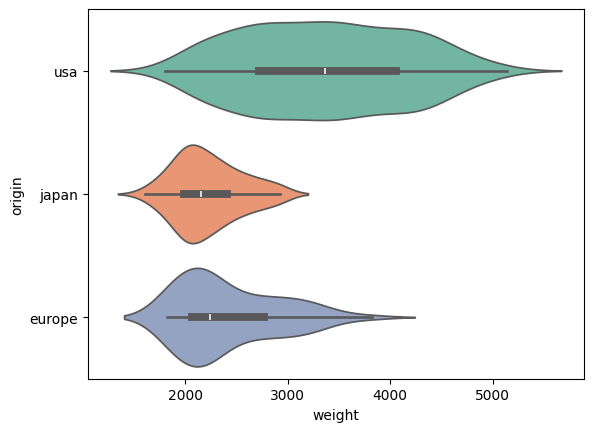

In [43]:
sns.violinplot(x='weight', y='origin', data=df, palette='Set2', inner='box', fill=True)
plt.show()